In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [13]:
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170319872/170498071 [============================>.] - ETA: 0sUntaring file...
('X_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

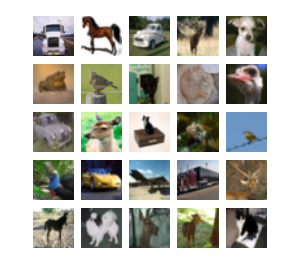

In [16]:
#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_test)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_test[i:i+1][0])

In [17]:
# Convert class vectors to binary class matrices.
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
model = Sequential()

In [23]:
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [24]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 30, 30, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 30, 30, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [27]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
nb_epoch = 25

In [29]:
model.fit(X_train, Y_train,
              batch_size=64,
              nb_epoch=nb_epoch,
              verbose=1,
              shuffle=True)

Epoch 1/25
50000/50000 [==============================] - 15s - loss: 1.7892 - acc: 0.3444    
Epoch 2/25
50000/50000 [==============================] - 14s - loss: 1.3569 - acc: 0.5161    
Epoch 3/25
50000/50000 [==============================] - 14s - loss: 1.1691 - acc: 0.5857    
Epoch 4/25
50000/50000 [==============================] - 14s - loss: 1.0515 - acc: 0.6319    
Epoch 5/25
50000/50000 [==============================] - 14s - loss: 0.9631 - acc: 0.6616    
Epoch 6/25
50000/50000 [==============================] - 14s - loss: 0.9047 - acc: 0.6841    
Epoch 7/25
50000/50000 [==============================] - 14s - loss: 0.8668 - acc: 0.6996    
Epoch 8/25
50000/50000 [==============================] - 14s - loss: 0.8327 - acc: 0.7121    
Epoch 9/25
50000/50000 [==============================] - 14s - loss: 0.8120 - acc: 0.7203    
Epoch 10/25
50000/50000 [==============================] - 14s - loss: 0.8032 - acc: 0.7244    
Epoch 11/25
50000/50000 [========================

In [31]:
scores = model.evaluate(X_test, Y_test, batch_size=64, verbose=1)
print("Test scores: ", scores)

10000/10000 [==============================] - 1s     
('Test scores: ', [0.88840492076873778, 0.71399999999999997])
